In [1]:
using Revise
#addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = Walk1D()
b = CBTSBandit(mdp; A_max=20, n_proposes=100, fit_qs=true)
solver = ModularSolver(mdp, b; n_iterations=200)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

Walk1DMDP.Walk1DState(0, 1.0)

In [4]:
hr = HistoryRecorder(; rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

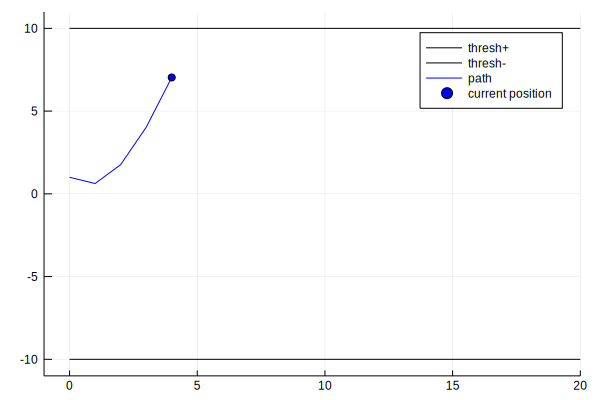

In [5]:
plot(mdp, h)

## CBTSObserver

In [6]:
mdp = Walk1D()
observer = AQObserver(1)
b = CBTSBandit(mdp; A_max=20, n_proposes=100, fit_qs=true, observer=observer)
solver = ModularSolver(mdp, b; n_iterations=500)
policy = solve(solver, mdp);

In [7]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
a, info = action_info(policy, s0)

(-0.3758966682122749, Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 500),Pair{Symbol,Any}(:search_time_us, 0x00000000000fcfd2),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(6, 9.12954)], Any[0.0020522], -0.918941, Any[], Any[], 0.0, 1.0, 1.0))))

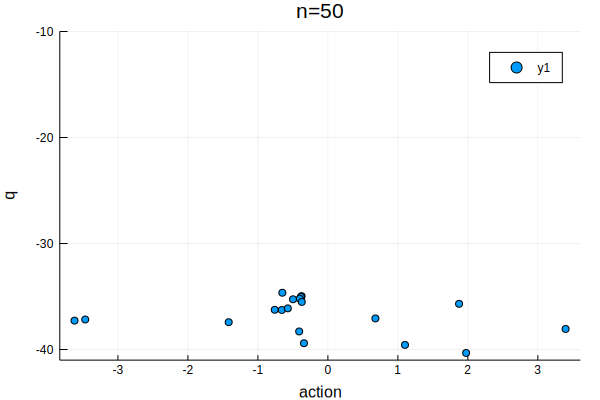

In [8]:
plot(observer, 50; ylim=(-41.0,-10.0))

In [9]:
animate(observer; fps=4, ylim=(-42.0,-10.0))

INFO: Saved animation to /Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif


Plots.AnimatedGif("/Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif")

In [10]:
observer.ys[5]

5-element Array{Float64,1}:
 -37.0664
 -37.169 
 -38.0613
 -37.4216
 -33.4795